# Определение факторов, влияющих на успешность видеоигр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Доступны данные до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

## Описание данных

- `Name` — название игры  
- `Platform` — платформа  
- `Year_of_Release` — год выпуска  
- `Genre` — жанр игры  
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
- `EU_sales` — продажи в Европе (миллионы проданных копий)  
- `JP_sales` — продажи в Японии (миллионы проданных копий)  
- `Other_sales` — продажи в других странах (миллионы проданных копий)  
- `Critic_Score` — оценка критиков (максимум 100)  
- `User_Score` — оценка пользователей (максимум 10)  
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

## Изучение и предобработка данных

### Изучение данных

In [71]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import matplotlib.ticker as ticker

pd.set_option('display.max_columns', None)

In [72]:
df = pd.read_csv('/datasets/games.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [73]:
for column in df.columns:
    print(column)
    print(df[column].sort_values().unique())
    print()
    print()

Name
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]


Platform
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


Year_of_Release
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]


Genre
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]


NA_sales
[0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02
 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01
 1.400e-01 1.500e-01 1.600e-01 1.700e-01 1.800e-01 1.900e-01 2.000e-01
 2.100e-01 2.200e-01 2.300e-01 2.400e-01 2.500e

In [74]:
#посмотрим сколько нулевых значений в оценках пользователей
df[df['User_Score'] == '0']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [75]:
df.duplicated().sum()

0

1. В данных нет дубликатов, намеков на скрытые дубликаты тоже, все достаточно чисто и аккуратно.  
2. Пропущено много значений в столбцах с рейтингами и оценками, с годом выхода. И есть по 2 пропущенных значения в столбцах с названием игры и жанром, посмотрим что это за игры.

In [76]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Если название игры не слишком важно для исследования, то жанр, рейтинги и оценки - важны. Пропущены значения в двух играх 1993 года, с совсем небольшими продажами - представляется эта информация вряд-ли поможет в достижении цели исследования, удалим.

Посмотрим пропуски в столбце с годом выхода.

In [77]:
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


На первый взгляд общего немного. Год выпуска можно восстановить частично по названию игры, если год там указан. Это будет не совсем точно, поскольку игра может быть вышла чуть раньше, но это не критично. Попробуем также определить, может год содержится в записях по одной и той же игре, проданной на разных платформах (в записи по одной платформе год обозначен, по другой - нет).

Далее посмотрим, что за игры со значениями "tbd" в столбце с оценками пользователей.

In [78]:
df[df['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [79]:
df[df['User_Score'] == 'tbd']['Year_of_Release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2007.0    192
2002.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: Year_of_Release, dtype: int64

In [80]:
df[df['User_Score'] == 0]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [81]:
df[df['User_Score'] == 0]['Year_of_Release'].value_counts()

Series([], Name: Year_of_Release, dtype: int64)

Не очень понятно, что подразумевает аббревиатура tbd, учитывая, что в столбце с оценками пользователей есть также одно нулевое и пропущенные значения. Возможно, это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Такие аббревиатуры используются, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

Вместе с тем, это не могут быть новые игры, по которым еще нет оценок пользователей, так как годы выхода подавляющего большинства игр далеки от 2016 года. Вероятно это также отсутствующие значения. Столбец необходимо привести к типу float, поэтому заменим строку tbd на NaN. Если заменить на какие-либо значения (ноль, среднее или медиана - это исказит статистические характеристики).

**Итак:**  

1. Наименование столбцов приведем к строчному виду.
2. Удалим две игры 1993 года с пропусками в существенных для исследования характеристиках.
3. Восстановим год выхода по тем играм, где год указан в названии. Попробуем также определить, может год содержится в записях по одной и той же игре, проданной на разных платформах (в записи по одной платформе год обозначен, по другой - нет).
4. Заполним tbd значениями nan.
5. `User_Score` для статанализа приведем к к float.  
6. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Предобработка данных

In [82]:
#изменим наименования столбцов
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [83]:
#удалим строки с пропущенным наизванием и жанром, проверим
df = df.dropna(subset=['name'])
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [84]:
#восстановим год выхода игр там, где можно
#посмотрим на игры с пропущенными годами
list_names_year_isna = df[df['year_of_release'].isna()]['name'].unique()
list_names_year_isna

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [85]:
#составим словарь по играм с пропущенными значениями, куда поместим название и уникальные годы выхода по каждой игре, 
#найденные по всем значениям. При этом, сразу не возьмем в словарь NaN
dict_name_year_isna={}
for name in list_names_year_isna:
    dict_name_year_isna[name] = [pd.Series(df.loc[df.index[df['name'] == name], 'year_of_release'].unique()).dropna()]
dict_name_year_isna

{'Madden NFL 2004': [1    2003.0
  dtype: float64],
 'FIFA Soccer 2004': [1    2003.0
  dtype: float64],
 'LEGO Batman: The Videogame': [0    2008.0
  dtype: float64],
 'wwe Smackdown vs. Raw 2006': [Series([], dtype: float64)],
 'Space Invaders': [1    1994.0
  2    1999.0
  3    2002.0
  dtype: float64],
 'Rock Band': [Series([], dtype: float64)],
 "Frogger's Adventures: Temple of the Frog": [Series([], dtype: float64)],
 'LEGO Indiana Jones: The Original Adventures': [0    2008.0
  dtype: float64],
 'Call of Duty 3': [0    2006.0
  dtype: float64],
 'Call of Duty: Black Ops': [0    2010.0
  dtype: float64],
 'Triple Play 99': [Series([], dtype: float64)],
 'Adventure': [Series([], dtype: float64)],
 'Combat': [Series([], dtype: float64)],
 'LEGO Harry Potter: Years 5-7': [1    2012.0
  dtype: float64],
 'NASCAR Thunder 2003': [1    2002.0
  dtype: float64],
 'Hitman 2: Silent Assassin': [0    2002.0
  2    2003.0
  dtype: float64],
 'Legacy of Kain: Soul Reaver': [Series([], dtype: 

Есть игры,у которых несколько годов выхода (примеры - см. ниже). Здесь две ситуации - годы последовательны, можно предположить, что на разных платформах игры вышли последовательно в смежные годы. Вторая ситуация - видимо, ремейки - очень большая разница между годами выхода. Со второй ситуацией непонятно чем заполнять, с первой - поставим самый ранний год выхода

Ситуация 1:   
'Space Invaders':   
[1    1994.0  
  2    1999.0  
  3    2002.0  
  dtype: float64]
  
  
Ситуация 2:   
 'Namco Museum':   
 [0    2001.0  
  2    2002.0  
  dtype: float64],    

Кроме того, много игр, где год отсутствует на любых платформах (в названии игры тоже), но много где на одной из платформ год указан.   
Также есть игра 'Triple Play 99' - год не указан, но есть в названии игры.  
Перезапишем словарь и с помощью него восстановим годы там, где можно.

In [86]:
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [87]:
df[df['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [88]:
#перезапишем словарь
dict_name_year_isna = {'Madden NFL 2004': 2003.0,
 'FIFA Soccer 2004': 2003.0,
 'LEGO Batman: The Videogame': 2008.0,
'LEGO Indiana Jones: The Original Adventures': 2008.0,
 'Call of Duty 3': 2006.0,
 'Call of Duty: Black Ops': 2010.0,
'LEGO Harry Potter: Years 5-7': 2012.0,
 'NASCAR Thunder 2003': 2002.0,
 'Hitman 2: Silent Assassin': 2002.0,
'Namco Museum': 2001.0,
'Rhythm Heaven': 2008.0,
 'The Lord of the Rings: War in the North': 2011.0,
 'Madden NFL 07': 2006.0,
 'MLB SlugFest 20-03': 2002.0,
 'Shaun White Snowboarding': 2008.0,
 'PES 2009: Pro Evolution Soccer': 2008.0,
'Madden NFL 11': 2010.0,
'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005.0,
'Metal Gear Solid 2: Substance': 2002.0,
'The Golden Compass': 2007.0,
 'Madden NFL 06': 2005.0,
 'NASCAR: Dirt to Daytona': 2002.0,
 'Madden NFL 2002': 2001.0,
 'Def Jam: Fight for NY': 2004.0,
 'NBA Street Vol. 2': 2003.0,
'Wet': 2009.0,
'Tiger Woods PGA Tour 07': 2006.0,
'NBA Live 2003': 2002.0,
'Tropico 4': 2011.0,
 'Tomb Raider (2013)': 2013.0,
 'Bejeweled 3': 2010.0,
 'Custom Robo': 2004.0,
 'Final Fantasy XI': 2006.0,
 'Singularity': 2010.0,
'Star Wars Jedi Knight II: Jedi Outcast': 2002.0,
'Harvest Moon: The Tale of Two Towns': 2010.0,
 'Shrek the Third': 2007.0,
 'Nicktoons: Battle for Volcano Island': 2006.0,
'Pac-Man Fever': 2001.0,
'Gun': 2005.0,
 'Rock Revolution': 2008.0,
 'College Hoops 2K6': 2005.0,
 'Jonah Lomu Rugby Challenge': 2011.0,
 'Mega Man X Collection': 2006.0,
 'BioShock 2': 2010.0,
 'Danganronpa: Trigger Happy Havoc': 2013.0,
"Tony Hawk's Downhill Jam": 2006.0,
'Robotech: Battlecry': 2002.0,
'WRC: FIA World Rally Championship': 2005.0,
'Dead Space 3': 2013.0,
'Star Trek: Legacy': 2006.0,
'NBA Starting Five': 2002.0,
 'Teen Titans': 2006.0,
"James Cameron's Dark Angel": 2002.0,
'Splatterhouse': 2010.0,
'WCW Backstage Assault': 1999.0,
'Transworld Surf': 2002.0,
 'Street Fighter IV': 2009.0,
'Record of Agarest War Zero': 2010.0,
 'Rocksmith': 2011.0,
'Street Hoops': 2002.0,
 'Godzilla: Destroy All Monsters Melee': 2002.0,
'Major League Baseball 2K6': 2006.0,
 'Star Trek: Conquest': 2007.0,
'Happy Feet Two': 2011.0,
 "Disney's Chicken Little: Ace In Action": 2006.0,
'Samurai Shodown Anthology': 2008.0,
'Get Fit with Mel B': 2010.0,
'Smashing Drive': 2002.0,
'Dead Island: Riptide': 2013.0,
'Rayman Arena': 2001.0,
 'National Geographic Challenge!': 2011.0,
'Captain America: Super Soldier': 2011.0,
'GRID': 2008.0,
'Monster Hunter Frontier Online': 2010.0,
 'RollerCoaster Tycoon': 2003.0,
 'Battle vs. Chess': 2011.0,
 'The History Channel: Great Battles - Medieval': 2010.0,
'NHL Hitz Pro': 2003.0,
 "Luxor: Pharaoh's Challenge": 2007.0,
'Major League Baseball 2K8': 2008.0,
'Majesty 2: The Fantasy Kingdom Sim': 2009.0,
'World of Tanks': 2011.0,
 'Tom and Jerry in War of the Whiskers': 2002.0,
'Runaway: A Twist of Fate': 2009.0,
"Cabela's Alaskan Adventure": 2006.0,
'Without Warning': 2005.0,
 'PDC World Championship Darts 2008': 2008.0,
 'Dinotopia: The Sunstone Odyssey': 2003.0,
"Dance! It's Your Stage": 2011.0,
'Aquaman: Battle for Atlantis': 2003.0,
'AKB1/48: Idol to Guam de Koishitara...': 2011.0,
 'Brothers in Arms: Furious 4': 2012.0,
'Freaky Flyers': 2003.0,
 'Inversion': 2012.0,
'Triple Play 99' : 1999.0,
'All-Star Baseball 2005': 2005.0,
'Drake of the 99 Dragons': 1999.0,
'Tour de France 2011': 2011.0,
'Sega Rally 2006': 2006,
'Football Manager 2007': 2007,
'wwe Smackdown vs. Raw 2006' : 2006.0,
 'NFL GameDay 2003': 2003
}

In [89]:
#заполним данными из словаря
for name in dict_name_year_isna:
    df.loc[df.index[df['name'] == name], 'year_of_release'] = \
    df.loc[df.index[df['name'] == name], 'year_of_release'].fillna(float(dict_name_year_isna.get(name)))
    
df.query('name in @dict_name_year_isna')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
213,Madden NFL 06,PS2,2005.0,Sports,3.98,0.26,0.01,0.66,88.0,8,E
241,Madden NFL 07,PS2,2006.0,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,2008.0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,2003.0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16442,Dinotopia: The Sunstone Odyssey,XB,2003.0,Action,0.01,0.00,0.00,0.00,44.0,tbd,T
16448,Inversion,PC,2012.0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M


In [90]:
#посмотрим что осталось
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Было 269 пропусков, стало 141. Хоть что-то!

In [91]:
#заполним nan значения tbd
df.loc[(df.user_score == 'tbd'), 'user_score'] = np.nan
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

user_score приведем к float:

In [92]:
#изменим тип данных и проверим
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16572 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


In [93]:
#добавим столбец с продажами итого
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

**Данные подготовлены к анализу:**

1. Наименование столбцов приведены к строчному виду.
2. Удалены две игры 1993 года с пропусками в существенных для исследования характеристиках.
3. Восстановлен год выхода по тем играм, где год указан в названии или на других платформах для этих игр указан год выхода.
4. В user_score строковые значения tbd (фактически - отсутствующие значения) заполнены NaN (чтобы не искажать описательные статистики), столбец приведен к типу float.  
5. Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.


Исследуем данные.

## Исследовательский анализ данных

### Годы выхода игр

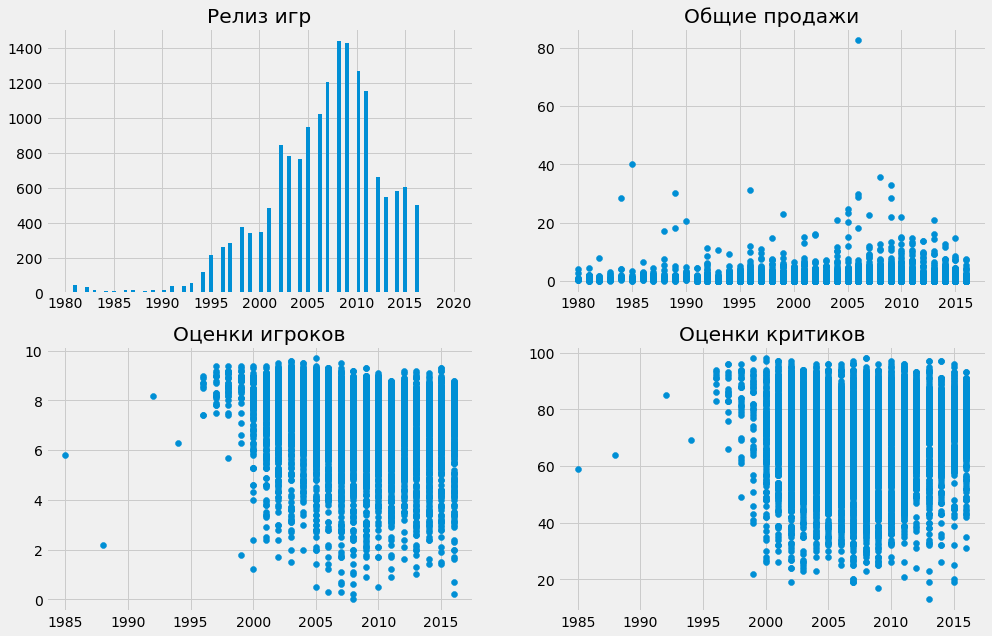

In [94]:
plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axs[0][0].hist(df["year_of_release"], range= (1980,2020), bins=100, rwidth=1)
axs[0][0].set_title('Релиз игр')

axs[0][1].scatter(df['year_of_release'], df['total_sales'])
axs[0][1].set_title('Общие продажи')

axs[1][0].scatter(df['year_of_release'], df['user_score'])
axs[1][0].set_title('Оценки игроков')

axs[1][1].scatter(df['year_of_release'], df['critic_score'])
axs[1][1].set_title('Оценки критиков')

plt.show()

In [95]:
year_sales = df.groupby('year_of_release')['total_sales'].agg(['count', 'sum'])
year_sales = year_sales.reset_index() #сбросим индекс по строкам
year_sales.rename(columns={"count": "games_count", "sum": "total_sales"}, inplace=True) #переименуем столбцы
year_sales['average_sales'] = year_sales['total_sales'] / year_sales['games_count']
year_sales

,year_of_release,games_count,total_sales,average_sales
0,1980.0,9,11.38,1.264444
1,1981.0,46,35.68,0.775652
2,1982.0,36,28.88,0.802222
3,1983.0,17,16.80,0.988235
4,1984.0,14,50.35,3.596429
5,1985.0,14,53.95,3.853571
6,1986.0,21,37.08,1.765714
7,1987.0,16,21.70,1.356250
8,1988.0,15,47.21,3.147333
9,1989.0,17,73.45,4.320588


**Интересно, по всем регионам и платформам:**

1. Количество выпущенных игр на всех платформах было максимальным в 2002-2011 годах и с тех пор снижается. 
2. Общая выручка по всем регионам была максимальной для игр, выпущенных в 2005-2010 и с тех пор снижается. 
3. Для игр, выпущенных до 2002 года средние продажи одной игры были существенно выше (обычно 0,6-0,8 млн. копий в год и выше), затем снизились до уровней 0,45-0,55 млн. копий в год. Для игр, выпущенных в 2012-2014 годах средние продажи одной игры в миллионах копий резко выросли (0,55-0,67 млн. копий), для игр, выпущенных в 2015-2016 годах средние продажи стали также резко снижаться (2015 - 0,44 млн. копий, 2016 - 0,26 млн. копий. Вероятно нужно 2-3 года для набора основной массы продаж игры, дальше они сильно падают.
4. Оценки игроков имеют небольшую тенденцию к ухудшению, начавшуюся, по видимому, для игр 2005 года и старше. С оценками критиков похожая небольшая тенденция к ухудшению с 2010 года. Однако эти тенденции не слишком заметны.

### Платформы и продажи

Посмотрим продажи по платформам.

In [96]:
platforms_sales = df.groupby('platform')['total_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False)
platforms_sales = platforms_sales.reset_index() #сбросим индекс по строкам
platforms_sales.rename(columns={"count": "games_count", "sum": "total_sales"}, inplace=True) #переименуем столбцы
platforms_sales

,platform,games_count,total_sales
0,PS2,2161,1255.77
1,X360,1262,971.42
2,PS3,1331,939.65
3,Wii,1320,907.51
4,DS,2151,806.12
5,PS,1197,730.86
6,GBA,822,317.85
7,PS4,392,314.14
8,PSP,1209,294.05
9,PC,974,259.52


In [97]:
dict_platform_years = {}

for platform in df['platform'].unique():
    dict_platform_years[platform] = df.query('platform == @platform')['year_of_release'].sort_values().dropna().unique()
dict_platform_years

{'Wii': array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016.]),
 'NES': array([1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
        1992., 1993., 1994.]),
 'GB': array([1988., 1989., 1990., 1991., 1992., 1994., 1995., 1996., 1997.,
        1998., 1999., 2000., 2001.]),
 'DS': array([1985., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
        2012., 2013.]),
 'X360': array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
        2014., 2015., 2016.]),
 'PS3': array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
        2014., 2015., 2016.]),
 'PS2': array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
        2009., 2010., 2011.]),
 'SNES': array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
        1999.]),
 'GBA': array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.]),
 'PS4': array([2013., 2014., 2015., 2016.]),
 '3DS': array([2010., 2011., 20

In [98]:
#добавим в таблицу с продажами по платформам год начала продаж на платформе, их окончания и количество лет,
#в течение которых на платформе осуществлялись продажи. А также средние продажи
platforms_sales['average_games_sales'] = platforms_sales['total_sales'] / platforms_sales['games_count']

for platform in platforms_sales['platform']:
    
    platforms_sales.loc[platforms_sales.index[platforms_sales['platform'] == platform], 'start_year'] = \
    dict_platform_years.get(platform)[0]
    
    platforms_sales.loc[platforms_sales.index[platforms_sales['platform'] == platform], 'last_year'] = \
    dict_platform_years.get(platform)[-1]
    
    platforms_sales.loc[platforms_sales.index[platforms_sales['platform'] == platform], 'count_years'] = \
    len(dict_platform_years.get(platform))
    
platforms_sales

,platform,games_count,total_sales,average_games_sales,start_year,last_year,count_years
0,PS2,2161,1255.77,0.581106,2000.0,2011.0,12.0
1,X360,1262,971.42,0.769746,2005.0,2016.0,12.0
2,PS3,1331,939.65,0.705973,2005.0,2016.0,12.0
3,Wii,1320,907.51,0.687508,2006.0,2016.0,11.0
4,DS,2151,806.12,0.374765,1985.0,2013.0,11.0
5,PS,1197,730.86,0.610576,1994.0,2003.0,10.0
6,GBA,822,317.85,0.386679,2000.0,2007.0,8.0
7,PS4,392,314.14,0.801378,2013.0,2016.0,4.0
8,PSP,1209,294.05,0.243218,2004.0,2015.0,12.0
9,PC,974,259.52,0.266448,1985.0,2016.0,26.0


От одного до двадцати шести лет! Построим графики и посчитаем описательные статистики.

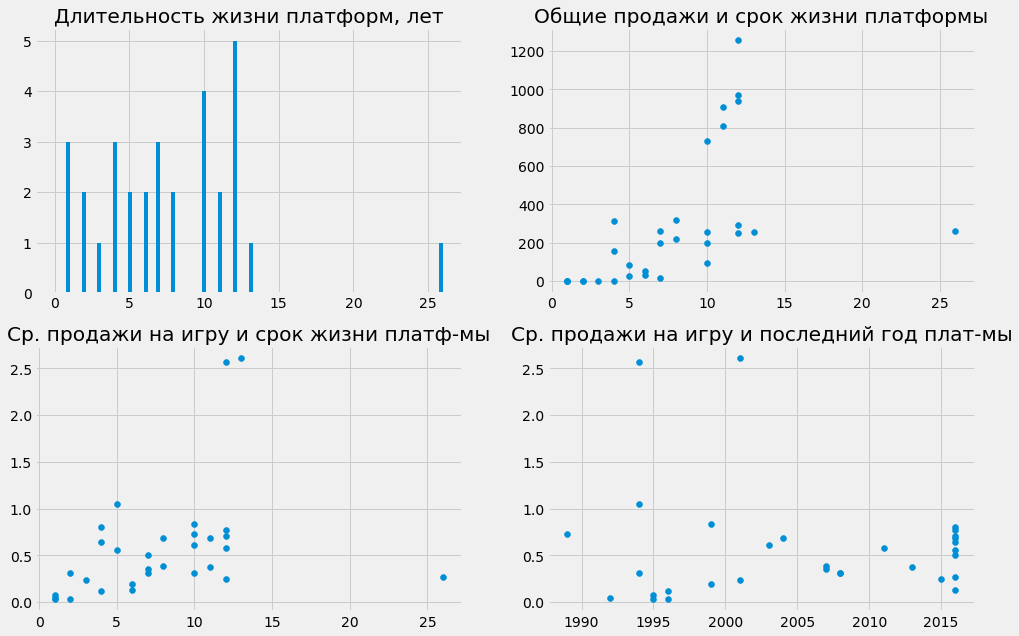

count    31.000000
mean      7.806452
std       5.108290
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: count_years, dtype: float64


,games_count,total_sales,average_games_sales,start_year,last_year,count_years
games_count,1.000000,0.900378,-0.057762,0.127409,0.606688,0.573075
total_sales,0.900378,1.000000,0.175193,0.161848,0.522695,0.512193
average_games_sales,-0.057762,0.175193,1.000000,-0.261038,-0.090275,0.343595
start_year,0.127409,0.161848,-0.261038,1.000000,0.706752,-0.258326
last_year,0.606688,0.522695,-0.090275,0.706752,1.000000,0.419374
count_years,0.573075,0.512193,0.343595,-0.258326,0.419374,1.000000


In [99]:
plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axs[0][0].hist(platforms_sales['count_years'], range= (0,26), bins=100, rwidth=1)
axs[0][0].set_title('Длительность жизни платформ, лет')

axs[0][1].scatter(platforms_sales['count_years'], platforms_sales['total_sales'])
axs[0][1].set_title('Общие продажи и срок жизни платформы')

axs[1][0].scatter(platforms_sales['count_years'], platforms_sales['average_games_sales'])
axs[1][0].set_title('Ср. продажи на игру и срок жизни платф-мы')

axs[1][1].scatter(platforms_sales['last_year'], platforms_sales['average_games_sales'])
axs[1][1].set_title('Ср. продажи на игру и последний год плат-мы')

plt.show()

print(platforms_sales['count_years'].describe())
platforms_sales.corr()

**Платформы:**

1. Средний срок жизни платформы - 7 лет, медианный 7,8 лет. Диапазон 1-26 лет. Большинство платформ живет до 12 лет.
2. Чем дольше срок жизни платформы, тем в целом больше общие продажи, что логично (умеренная положительная корреляция - 0,51). Корреляция срока жизни со средними продажами на игру слабая положительная (0,34).
3. До 2002 года существовал существенный разброс платформ по средним продажам на игру, в дальнейшем ситуация выровнялась.
4. 9 платформ действуют (последний год, доступный в данных - 2016). Для 3 платформ последний год 2011, 2013 и 2015. Еще 4 платформы - 2007-2008 годы. Еще 4 платформы - 2001 (2шт), 2003, 2004 годы. Остальные существовали до 2000 года. Из платформ, продававших игры после 2000 года, логично выбрать актуальный период, за который и рассматривать данные.

Учтем, что при анализе продаж по годам выхода игр (по всем платформам) мы сделали следующие выводы:
- для игр, выпущенных до 2002 года средние продажи одной игры были существенно выше (обычно 0,6-0,8 млн. копий в год и выше), затем снизились до уровней 0,45-0,55 млн. копий в год. Для игр, выпущенных в 2012-2014 годах средние продажи одной игры в миллионах копий резко выросли (0,55-0,67 млн. копий), для игр, выпущенных в 2015-2016 годах средние продажи стали также резко снижаться (2015 - 0,44 млн. копий, 2016 - 0,26 млн. копий. Вероятно нужно 2-3 года для набора основной массы продаж игры, дальше они сильно падают.

Представляется, что разумно взять данные по играм с релизом от 2002 года и новее, поскольку после этого года рынок видеоигр изменился и находится в своем современном состоянии. 

Вместе с тем, идустрия и тренды быстро меняются и, вероятно, 5 лет - максимальный срок давности, чтобы понять текущие тренды. Необходимо посмотреть объем информации по играм с релизом от 2012 года и новее. Это связано с пиками выхода игр до 2011 года включительно на "отживших" платформах.

Также, отметим у всех платформ в п. 2 продажи до 1 млн. копий, за исключением одной платформы с последним годом 2001 - средние продажи на игру 2.6 млн. копий. При этом, из действующих в 2016 году 9 платформ - 6 платформ со средними продажами на игру от 0.5 до 1 млн. копий. Посмотрим на них тоже в подразделе "Потенциально более прибыльные платформы".

In [100]:
sample = df.query('year_of_release >= 2012')
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2899 non-null   object 
 1   platform         2899 non-null   object 
 2   year_of_release  2899 non-null   float64
 3   genre            2899 non-null   object 
 4   na_sales         2899 non-null   float64
 5   eu_sales         2899 non-null   float64
 6   jp_sales         2899 non-null   float64
 7   other_sales      2899 non-null   float64
 8   critic_score     1322 non-null   float64
 9   user_score       1540 non-null   float64
 10  rating           1623 non-null   object 
 11  total_sales      2899 non-null   float64
dtypes: float64(8), object(4)
memory usage: 294.4+ KB


Что-то потеряли, но зато данные актуальны. Дальше будем работать с ними.

**Вывод:**

1. Средний срок жизни платформы - 7 лет, медианный 7,8 лет. Диапазон 1-26 лет. Большинство платформ живет до 12 лет.
2. Чем дольше срок жизни платформы, тем в целом больше общие продажи, что логично (умеренная положительная корреляция - 0,51). Корреляция срока жизни со средними продажами на игру слабая положительная (0,34).
3. До 2002 года существовал существенный разброс платформ по средним продажам на игру, в дальнейшем ситуация выровнялась.
4. 9 платформ действуют (последний год, доступный в данных - 2016). Для 3 платформ последний год 2011, 2013 и 2015. Еще 4 платформы - 2007-2008 годы. Еще 4 платформы - 2001 (2шт), 2003, 2004 годы. Остальные существовали до 2000 года. Из платформ, продававших игры после 2000 года, логично выбрать актуальный период, за который и рассматривать данные.

Учтем, что при анализе продаж по годам выхода игр (по всем платформам) мы сделали следующие выводы:
- для игр, выпущенных до 2002 года средние продажи одной игры были существенно выше (обычно 0,6-0,8 млн. копий в год и выше), затем снизились до уровней 0,45-0,55 млн. копий в год. Для игр, выпущенных в 2012-2014 годах средние продажи одной игры в миллионах копий резко выросли (0,55-0,67 млн. копий), для игр, выпущенных в 2015-2016 годах средние продажи стали также резко снижаться (2015 - 0,44 млн. копий, 2016 - 0,26 млн. копий. Вероятно нужно 2-3 года для набора основной массы продаж игры, дальше они сильно падают.

Представляется, что разумно взять данные по играм с релизом от 2002 года и новее, поскольку после этого года рынок видеоигр изменился и находится в своем современном состоянии. Вместе с тем, идустрия и тренды быстро меняются и, вероятно, 5 лет - максимальный срок давности, чтобы понять текущие тренды. Необходимо посмотреть объем информации по играм с релизом от 2012 года и новее. Это связано с пиками выхода игр до 2011 года включительно на "отживших" платформах. Далее работа будет с данными от 2012 года и новее.

Также, отметим у всех платформ в п. 2 продажи до 1 млн. копий, за исключением одной платформы с последним годом 2001 - средние продажи на игру 2.6 млн. копий. При этом, из действующих в 2016 году 9 платформ - 6 платформ со средними продажами на игру от 0.5 до 1 млн. копий. Посмотрим на них тоже в подразделе "Потенциально более прибыльные платформы".

### Потенциально более прибыльные платформы

Мы отмечали выше, что из действующих в 2016 году 9 платформ - 6 платформ со средними продажами на игру от 0.5 до 1 млн. копий. Посмотрим на них.

In [101]:
platforms_sales.query('last_year == 2016')

,platform,games_count,total_sales,average_games_sales,start_year,last_year,count_years
1,X360,1262,971.42,0.769746,2005.0,2016.0,12.0
2,PS3,1331,939.65,0.705973,2005.0,2016.0,12.0
3,Wii,1320,907.51,0.687508,2006.0,2016.0,11.0
7,PS4,392,314.14,0.801378,2013.0,2016.0,4.0
9,PC,974,259.52,0.266448,1985.0,2016.0,26.0
10,3DS,520,259.00,0.498077,2010.0,2016.0,7.0
17,XOne,247,159.32,0.645020,2013.0,2016.0,4.0
19,WiiU,147,82.19,0.559116,2012.0,2016.0,5.0
20,PSV,430,54.07,0.125744,2011.0,2016.0,6.0


**X360 (год выхода консоли 2005), PS3 (2005), Wii (2006), PS4 (2013), XOne (2013), WiiU (2012)** - средние продажи по ним от 0.5 до 0,8 млн. копий на одну игру. Современные лидеры рынка.  
**Отметим, что размещение игр на этих платформах, вероятно, приведет к большим продажам, чем на остальных платформах.** С учетом среднего срока жизни платформы в 7,8 лет на старых платформы XBox, PlayStation и Nintendo 2005-2006 годов казалось бы нет смысла выпускать новые игры. Однако не все так просто, лучше посмотреть среднюю выручку по годам релиза игр по каждой платформе.

3DS (2010) и PSV (2011) не взлетели. PC тоже не конкурент консолям.

In [102]:
#cгруппируем по годам и платформам
platforms_year_sales = pd.pivot_table(sample, index=['platform', 'year_of_release'], values='total_sales', aggfunc=['sum','count', 'mean'])
platforms_year_sales = platforms_year_sales.reset_index() #сбросим мультииндекс по строкам
platforms_year_sales.columns = [("_".join(c) if c[1] != "" else c[0]) for c in platforms_year_sales.columns] #разровняем столбцы
platforms_year_sales

,platform,year_of_release,sum_total_sales,count_total_sales,mean_total_sales
0,3DS,2012.0,51.76,94,0.550638
1,3DS,2013.0,56.57,91,0.621648
2,3DS,2014.0,43.76,80,0.547000
3,3DS,2015.0,27.78,86,0.323023
4,3DS,2016.0,15.14,46,0.329130
5,DS,2012.0,11.67,24,0.486250
6,DS,2013.0,1.54,8,0.192500
7,PC,2012.0,23.45,63,0.372222
8,PC,2013.0,13.01,41,0.317317
9,PC,2014.0,13.28,47,0.282553


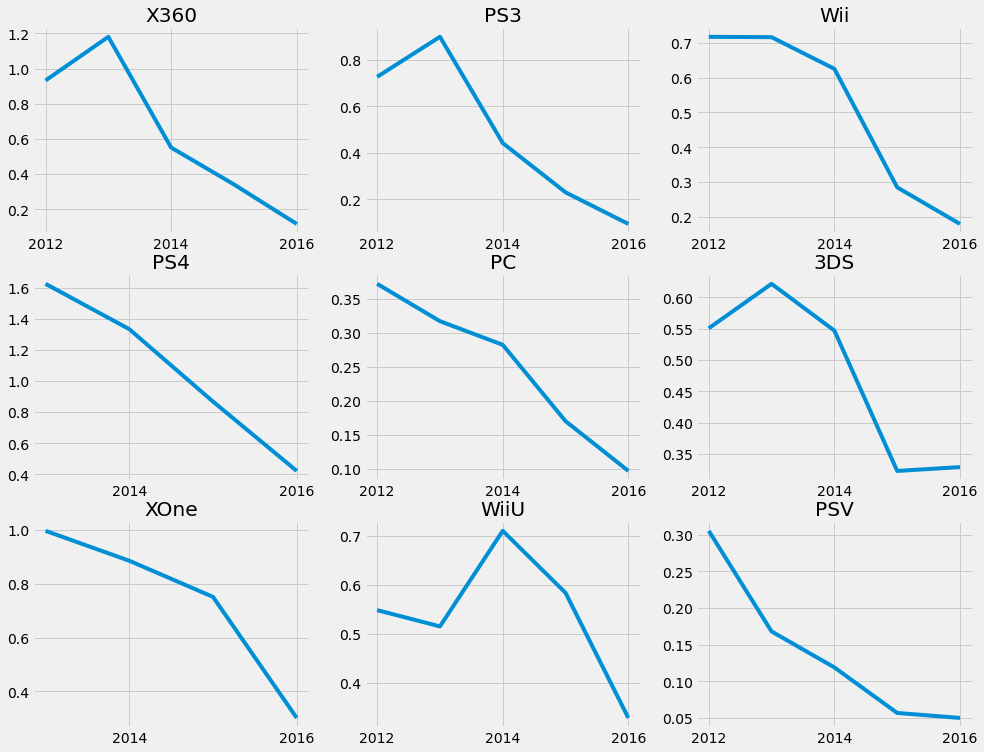

In [103]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axs[0][0].plot(
    platforms_year_sales[platforms_year_sales['platform'] == 'X360']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == 'X360']['mean_total_sales'])
axs[0][0].set_title('X360')
axs[0][0].xaxis.set_major_locator(ticker.MultipleLocator(2))

axs[0][1].plot(
    platforms_year_sales[platforms_year_sales['platform'] == 'PS3']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == 'PS3']['mean_total_sales'])
axs[0][1].set_title('PS3')
axs[0][1].xaxis.set_major_locator(ticker.MultipleLocator(2))

axs[0][2].plot(
    platforms_year_sales[platforms_year_sales['platform'] == 'Wii']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == 'Wii']['mean_total_sales'])
axs[0][2].set_title('Wii')
axs[0][2].xaxis.set_major_locator(ticker.MultipleLocator(2))

axs[1][0].plot(
    platforms_year_sales[platforms_year_sales['platform'] == 'PS4']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == 'PS4']['mean_total_sales'])
axs[1][0].set_title('PS4')
axs[1][0].xaxis.set_major_locator(ticker.MultipleLocator(2))

axs[1][1].plot(
    platforms_year_sales[platforms_year_sales['platform'] == 'PC']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == 'PC']['mean_total_sales'])
axs[1][1].set_title('PC')
axs[1][1].xaxis.set_major_locator(ticker.MultipleLocator(2))

axs[1][2].plot(
    platforms_year_sales[platforms_year_sales['platform'] == '3DS']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == '3DS']['mean_total_sales'])
axs[1][2].set_title('3DS')
axs[1][2].xaxis.set_major_locator(ticker.MultipleLocator(2))

axs[2][0].plot(
    platforms_year_sales[platforms_year_sales['platform'] == 'XOne']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == 'XOne']['mean_total_sales'])
axs[2][0].set_title('XOne')
axs[2][0].xaxis.set_major_locator(ticker.MultipleLocator(2))

axs[2][1].plot(
    platforms_year_sales[platforms_year_sales['platform'] == 'WiiU']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == 'WiiU']['mean_total_sales'])
axs[2][1].set_title('WiiU')
axs[2][1].xaxis.set_major_locator(ticker.MultipleLocator(2))

axs[2][2].plot(
    platforms_year_sales[platforms_year_sales['platform'] == 'PSV']['year_of_release'], 
    platforms_year_sales[platforms_year_sales['platform'] == 'PSV']['mean_total_sales'])
axs[2][2].set_title('PSV')
axs[2][2].xaxis.set_major_locator(ticker.MultipleLocator(2))


plt.show()

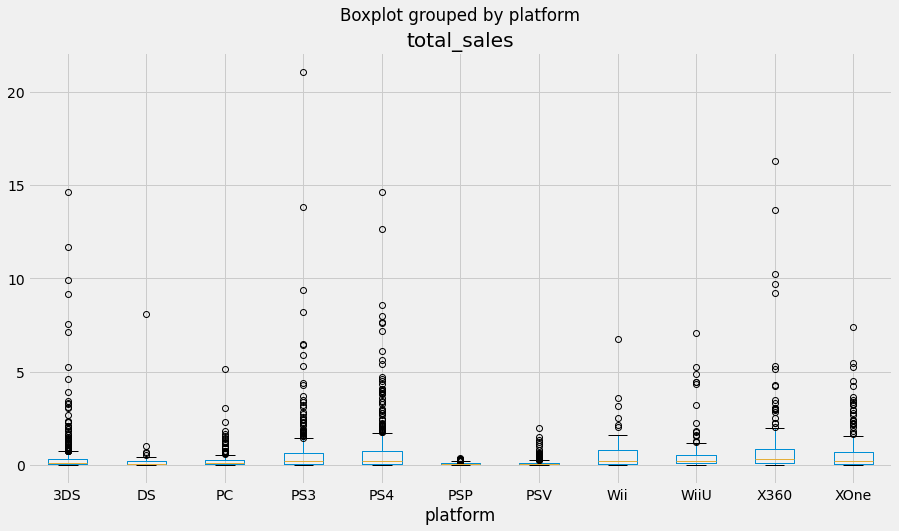

In [104]:
plt.style.use("fivethirtyeight")
ax = sample.boxplot('total_sales', by='platform', figsize=(15, 8))

(0.0, 1.8)

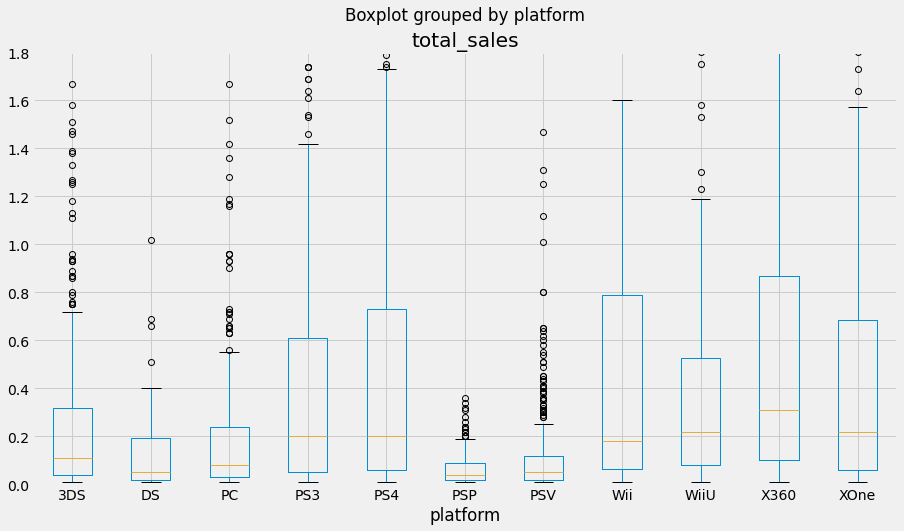

In [105]:
plt.style.use("fivethirtyeight")
ax = sample.boxplot('total_sales', by='platform', figsize=(15, 8))
ax.set_ylim(0, 1.8)

С учетом ранее сделанного предположения, что играм необходимо 2-3 года, чтобы набрать основную массу продаж, отмечаем, что на старых платформах XBox, PlayStation и Nintendo 2005-2006 годов продажи игр ниже, чем у новых, и упали почти до нуля. Медианы и межквартильный размах также свидетельствуют в пользу новых платформ от большой тройки PS4 (2013), XOne (2013), WiiU (2012) (за исключением XOne). Остальные платформы (3DS, DS, PC, PS2, PSP, PSV) - отстают очень существенно по средним и межкартильным размахам.

**Вывод:**

X360 (год выхода консоли 2005), PS3 (2005), Wii (2006), PS4 (2013), XOne (2013), WiiU (2012) - средние продажи по ним от 0.5 до 0,8 млн. копий на одну игру. Современные лидеры рынка. С учетом среднего срока жизни платформы в 7,8 лет на старых платформы XBox, PlayStation и Nintendo 2005-2006 годов нет особого смысла выпускать новые игры.   

**Самые популярные и продающие платформы: PS4 (2013), XOne (2013), WiiU (2012).**

Далее посмотрим, как влияют на продажи внутри одной платформы отзывы пользователей, критиков и рейтинги. Возьмем X360 - больше всего игр именно на этой платформе.

### Оценки пользователей, критиков и продажи

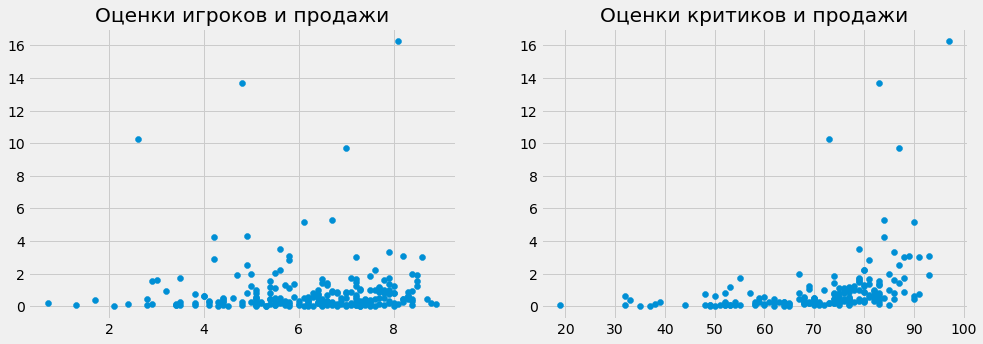

0.006314938203567018


0.36026590261380537

In [106]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(sample[sample['platform'] == 'X360']["user_score"], sample[sample['platform'] == 'X360']["total_sales"])
axs[0].set_title('Оценки игроков и продажи')

axs[1].scatter(sample[sample['platform'] == 'X360']["critic_score"], sample[sample['platform'] == 'X360']["total_sales"])
axs[1].set_title('Оценки критиков и продажи')

plt.show()

print(sample[sample['platform'] == 'X360']["user_score"].corr(sample[sample['platform'] == 'X360']["total_sales"]))
sample[sample['platform'] == 'X360']["critic_score"].corr(sample[sample['platform'] == 'X360']["total_sales"])

Между оценками игроков и продажами на платформе X360 корреляция отсутствует(коэффициент 0,006), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,36).

Посмотрим по остальным популярным платформам большой тройки, персональные компьютеры и в целом по всем платформам в нашей выборке.

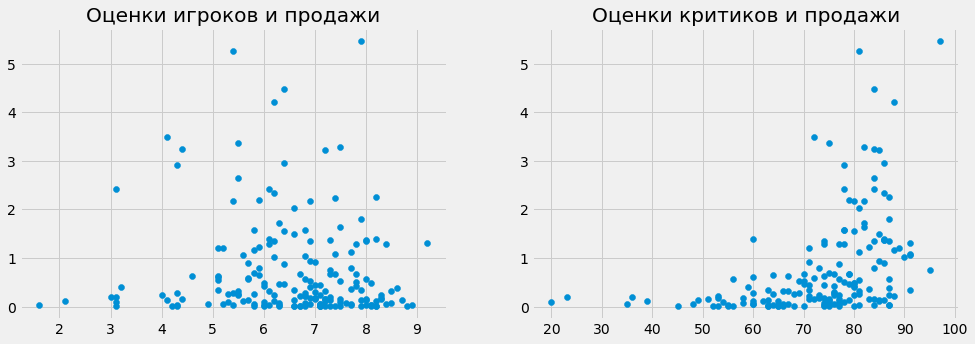

-0.06892505328279416


0.4169983280084017

In [107]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(sample[sample['platform'] == 'XOne']["user_score"], sample[sample['platform'] == 'XOne']["total_sales"])
axs[0].set_title('Оценки игроков и продажи')

axs[1].scatter(sample[sample['platform'] == 'XOne']["critic_score"], sample[sample['platform'] == 'XOne']["total_sales"])
axs[1].set_title('Оценки критиков и продажи')

plt.show()

print(sample[sample['platform'] == 'XOne']["user_score"].corr(sample[sample['platform'] == 'XOne']["total_sales"]))
sample[sample['platform'] == 'XOne']["critic_score"].corr(sample[sample['platform'] == 'XOne']["total_sales"])

Между оценками игроков и продажами на платформе XOne практически нет корреляции (коэффициент -0,07), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,42).

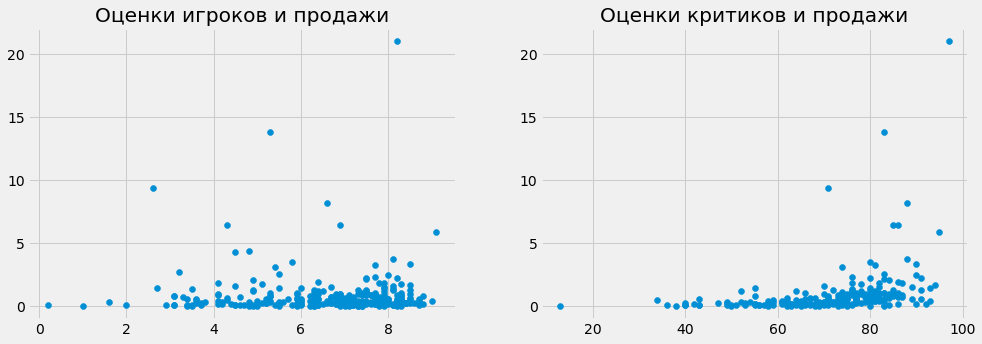

-0.005043048088258084


0.3313706318754621

In [108]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(sample[sample['platform'] == 'PS3']["user_score"], sample[sample['platform'] == 'PS3']["total_sales"])
axs[0].set_title('Оценки игроков и продажи')

axs[1].scatter(sample[sample['platform'] == 'PS3']["critic_score"], sample[sample['platform'] == 'PS3']["total_sales"])
axs[1].set_title('Оценки критиков и продажи')

plt.show()

print(sample[sample['platform'] == 'PS3']["user_score"].corr(sample[sample['platform'] == 'PS3']["total_sales"]))
sample[sample['platform'] == 'PS3']["critic_score"].corr(sample[sample['platform'] == 'PS3']["total_sales"])

Между оценками игроков и продажами на платформе PS3 корреляция отсутствует (коэффициент -0,005), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,33).

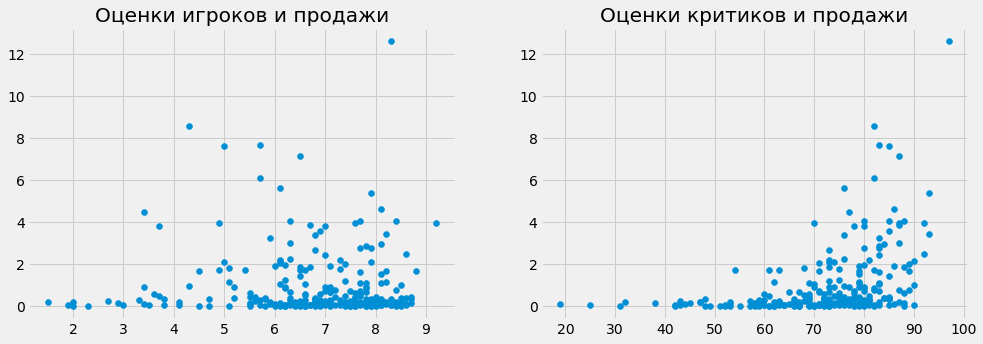

-0.031957110204556424


0.4065679020617816

In [109]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(sample[sample['platform'] == 'PS4']["user_score"], sample[sample['platform'] == 'PS4']["total_sales"])
axs[0].set_title('Оценки игроков и продажи')

axs[1].scatter(sample[sample['platform'] == 'PS4']["critic_score"], sample[sample['platform'] == 'PS4']["total_sales"])
axs[1].set_title('Оценки критиков и продажи')

plt.show()

print(sample[sample['platform'] == 'PS4']["user_score"].corr(sample[sample['platform'] == 'PS4']["total_sales"]))
sample[sample['platform'] == 'PS4']["critic_score"].corr(sample[sample['platform'] == 'PS4']["total_sales"])

Между оценками игроков и продажами на платформе PS4 практически нет корреляции (коэффициент -0,03), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,41).

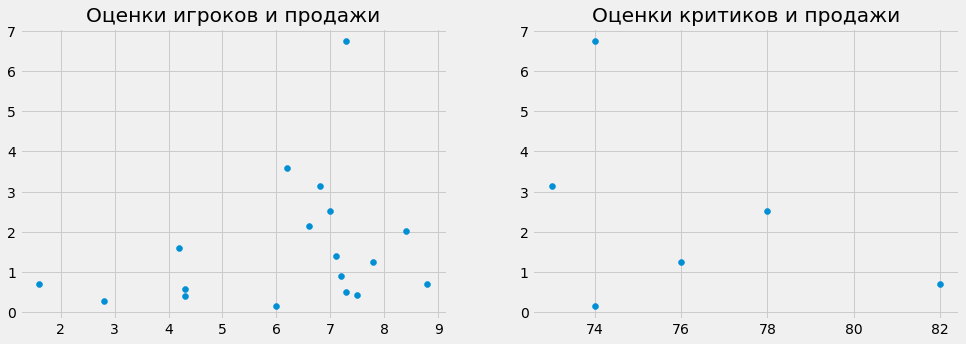

0.2775423925955098


-0.4059967406465306

In [110]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(sample[sample['platform'] == 'Wii']["user_score"], sample[sample['platform'] == 'Wii']["total_sales"])
axs[0].set_title('Оценки игроков и продажи')

axs[1].scatter(sample[sample['platform'] == 'Wii']["critic_score"], sample[sample['platform'] == 'Wii']["total_sales"])
axs[1].set_title('Оценки критиков и продажи')

plt.show()

print(sample[sample['platform'] == 'Wii']["user_score"].corr(sample[sample['platform'] == 'Wii']["total_sales"]))
sample[sample['platform'] == 'Wii']["critic_score"].corr(sample[sample['platform'] == 'Wii']["total_sales"])

Между оценками игроков и продажами на платформе Wii слабая положительная корреляция (коэффициент 0,28), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,41).

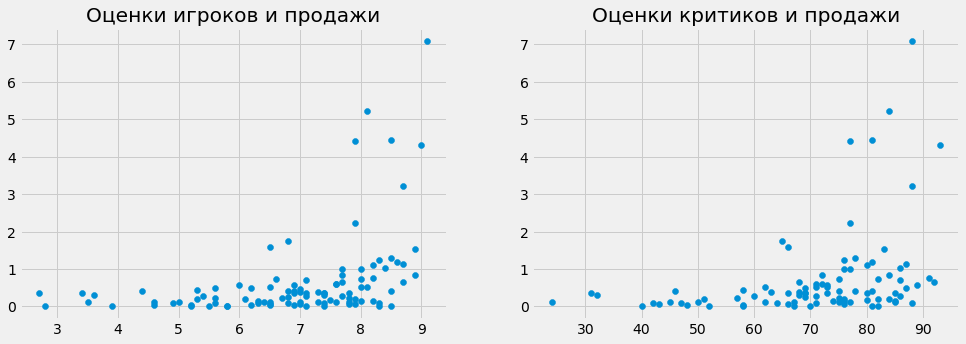

0.4002190202148617


0.34837976012017485

In [111]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(sample[sample['platform'] == 'WiiU']["user_score"], sample[sample['platform'] == 'WiiU']["total_sales"])
axs[0].set_title('Оценки игроков и продажи')

axs[1].scatter(sample[sample['platform'] == 'WiiU']["critic_score"], sample[sample['platform'] == 'WiiU']["total_sales"])
axs[1].set_title('Оценки критиков и продажи')

plt.show()

print(sample[sample['platform'] == 'WiiU']["user_score"].corr(sample[sample['platform'] == 'WiiU']["total_sales"]))
sample[sample['platform'] == 'WiiU']["critic_score"].corr(sample[sample['platform'] == 'WiiU']["total_sales"])

Между оценками игроков и продажами на платформе WiiU слабая положительная корреляция (коэффициент 0,4), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,35).

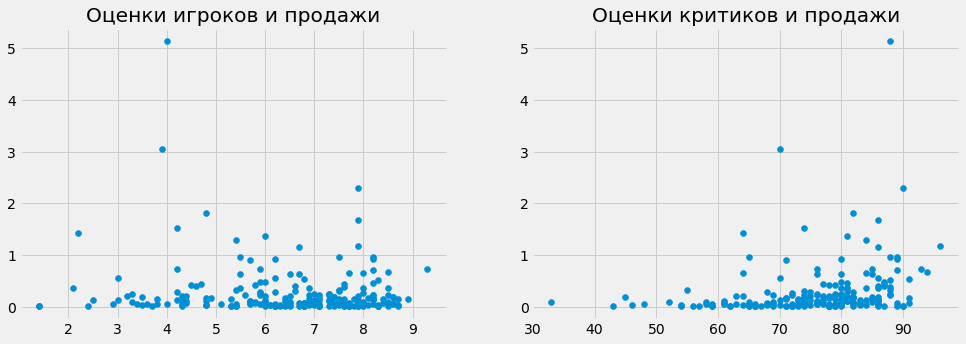

-0.12033868316119592


0.24057023259681218

In [112]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(sample[sample['platform'] == 'PC']["user_score"], sample[sample['platform'] == 'PC']["total_sales"])
axs[0].set_title('Оценки игроков и продажи')

axs[1].scatter(sample[sample['platform'] == 'PC']["critic_score"], sample[sample['platform'] == 'PC']["total_sales"])
axs[1].set_title('Оценки критиков и продажи')

plt.show()

print(sample[sample['platform'] == 'PC']["user_score"].corr(sample[sample['platform'] == 'PC']["total_sales"]))
sample[sample['platform'] == 'PC']["critic_score"].corr(sample[sample['platform'] == 'PC']["total_sales"])

Между оценками игроков и продажами на платформе PС очень слабая отрицательная корелляция (коэффициент -0,12), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,24).

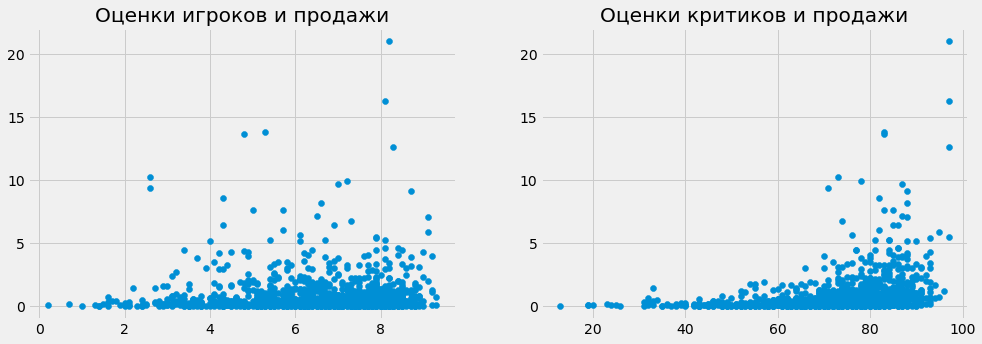

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092571,-0.053165,-0.062186,-0.057165,0.014429,-0.023325,-0.083069
na_sales,-0.092571,1.000000,0.767514,0.270784,0.792289,0.289884,-0.014079,0.920994
eu_sales,-0.053165,0.767514,1.000000,0.264885,0.936893,0.283273,-0.021695,0.927478
jp_sales,-0.062186,0.270784,0.264885,1.000000,0.202926,0.116204,0.162907,0.450156
other_sales,-0.057165,0.792289,0.936893,0.202926,1.000000,0.272306,-0.010746,0.909524
critic_score,0.014429,0.289884,0.283273,0.116204,0.272306,1.000000,0.518192,0.307951
user_score,-0.023325,-0.014079,-0.021695,0.162907,-0.010746,0.518192,1.000000,0.004519
total_sales,-0.083069,0.920994,0.927478,0.450156,0.909524,0.307951,0.004519,1.000000


In [113]:

plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(sample["user_score"], sample["total_sales"])
axs[0].set_title('Оценки игроков и продажи')

axs[1].scatter(sample["critic_score"], sample["total_sales"])
axs[1].set_title('Оценки критиков и продажи')

plt.show()

sample.corr()

**Вывод:**

1. Между оценками игроков и продажами на платформе X360 нет корелляции (коэффициент 0,006), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,36).
2. Между оценками игроков и продажами на платформе XOne практически нет корреляции (коэффициент -0,07), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,42).
3. Между оценками игроков и продажами на платформе PS3 очень нет кореляции (коэффициент -0,005), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,33).
4. Между оценками игроков и продажами на платформе PS4 практически нет корреляции (коэффициент -0,03), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,41).
5. Между оценками игроков и продажами на платформе Wii слабая положительная корреляция (коэффициент 0,28), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,41).
6. Между оценками игроков и продажами на платформе WiiU слабая положительная корреляция (коэффициент 0,4), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,35).
7. Между оценками игроков и продажами на платформе PС очень слабая отрицательня корреляция (коэффициент -0,12), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,24).
8. Между оценками игроков и продажами на всех платформах нет корреляции (коэффициент 0,004), между оценками критиков и продажами слабая положительная корреляция (коэффициент 0,31).

Оценки игроков практически ни на одной платформе не влияют на продажи (очень слабая то положительная, то отрицательная корреляция), но выделяется платформа WiiU, где между оценками игроков и продажами есть слабая корреляция.  
Оценки критиков на всех платформах слабо влияют на продажи (слабая положительная корреляция).

### Рейтинг

Посмотрим взаимосвязь рейтинга и продаж.

В рейтингах много пропущенных значений, предполагаем, что это игры без рейтинга. Чтобы проанализировать продажи по играм без рейтинга - заменим пропущенные значения на строку 'NO'.

In [114]:
sample['rating'] = sample['rating'].fillna('NO')
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2899 non-null   object 
 1   platform         2899 non-null   object 
 2   year_of_release  2899 non-null   float64
 3   genre            2899 non-null   object 
 4   na_sales         2899 non-null   float64
 5   eu_sales         2899 non-null   float64
 6   jp_sales         2899 non-null   float64
 7   other_sales      2899 non-null   float64
 8   critic_score     1322 non-null   float64
 9   user_score       1540 non-null   float64
 10  rating           2899 non-null   object 
 11  total_sales      2899 non-null   float64
dtypes: float64(8), object(4)
memory usage: 294.4+ KB


/tmp/ipykernel_24/4048391293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['rating'] = sample['rating'].fillna('NO')


In [115]:
raiting_sales = sample.groupby('rating')['total_sales'].agg(['count', 'sum', 'mean'])
raiting_sales = raiting_sales.reset_index() #сбросим индекс по строкам
raiting_sales.sort_values('mean', ascending=False)

,rating,count,sum,mean
2,M,503,510.76,1.015427
0,E,395,287.17,0.727013
1,E10+,313,160.15,0.511661
4,T,412,162.94,0.395485
3,NO,1276,331.06,0.259451


Средние продажи на игру с рейтингом M максимальны (1,02 млн. копий), далее E (0,73 млн. копий), далее E10+ (0,51 млн. копий), далее T (0,40 млн. копий), по остальным (EC, PR) рейтингам нет данных. Средние продажи игр без рейтинга значительно ниже (0,26 млн. копий) - не вариант для хороших продаж.

### Жанры

Посмотрим взаимосвязь рейтинга и продаж.

In [116]:
genre_sales = sample.groupby('genre')['total_sales'].agg(['count', 'sum', 'mean'])
genre_sales = genre_sales.reset_index() #сбросим индекс по строкам
genre_sales.sort_values('mean', ascending=False)

,genre,count,sum,mean
8,Shooter,237,304.75,1.285865
4,Platform,85,61.00,0.717647
10,Sports,268,181.07,0.675634
7,Role-Playing,370,192.80,0.521081
6,Racing,115,53.50,0.465217
3,Misc,193,85.28,0.441865
9,Simulation,80,35.12,0.439000
0,Action,1041,446.41,0.428828
2,Fighting,109,44.49,0.408165
11,Strategy,71,13.34,0.187887


Средние продажи на игру по жанрам отличаются. Вот пятерка лидеров (млн. копий): 
1. Shooter - 1.29
2. Platform - 0.72
3. Sports - 0.68
4. Role-Playing - 0.52
5. Racing - 0.47

### Вывод

**Годы выхода игр:**

1. Количество выпущенных игр на всех платформах было максимальным в 2002-2011 годах и с тех пор снижается. 
2. Общая выручка по всем регионам была максимальной для игр, выпущенных в 2005-2010 и с тех пор снижается. 
3. Для игр, выпущенных до 2002 года средние продажи одной игры были существенно выше (обычно 0,6-0,8 млн. копий в год и выше), затем снизились до уровней 0,45-0,55 млн. копий в год. Для игр, выпущенных в 2012-2014 годах средние продажи одной игры в миллионах копий резко выросли (0,55-0,67 млн. копий), для игр, выпущенных в 2015-2016 годах средние продажи стали также резко снижаться (2015 - 0,44 млн. копий, 2016 - 0,26 млн. копий. Вероятно нужно 2-3 года для набора основной массы продаж игры, дальше они сильно падают.
4. Оценки игроков имеют небольшую тенденцию к ухудшению, начавшуюся, по видимому, для игр 2005 года и старше. С оценками критиков похожая небольшая тенденция к ухудшению с 2010 года. Однако эти тенденции не слишком заметны.

**Популярные платформы:**

1. Средний срок жизни платформы - 7 лет, медианный 7,8 лет. Диапазон 1-26 лет. Большинство платформ живет до 12 лет.
2. Чем дольше срок жизни платформы, тем в целом больше общие продажи, что логично (умеренная положительная корреляция - 0,51). Корреляция срока жизни со средними продажами на игру слабая положительная (0,34).
3. До 2002 года существовал существенный разброс платформ по средним продажам на игру, в дальнейшем ситуация выровнялась.
4. 9 платформ действуют (последний год, доступный в данных - 2016). Для 3 платформ последний год 2011, 2013 и 2015. Еще 4 платформы - 2007-2008 годы. Еще 4 платформы - 2001 (2шт), 2003, 2004 годы. Остальные существовали до 2000 года. Из платформ, продававших игры после 2000 года. Мы взяли данные по играм, вышедшим в 2002 году и позже.
5. X360 (год выхода консоли 2005), PS3 (2005), Wii (2006), PS4 (2013), XOne (2013), WiiU (2012) - средние продажи по ним от 0.5 до 0,8 млн. копий на одну игру. Современные лидеры рынка. При этом, на старых платформах XBox, PlayStation и Nintendo 2005-2006 годов продажи игр ниже, чем у новых, и упали почти до нуля. Медианы и межквартильный размах также свидетельствуют в пользу новых платформ от большой тройки. С учетом среднего срока жизни платформы в 7,8 лет на старых платформы XBox, PlayStation и Nintendo 2005-2006 годов нет особого смысла выпускать новые игры. **Самые популярные и продающие платформы: PS4 (2013), XOne (2013), WiiU (2012).**


**Оценки игроков и критиков:**

1. Оценки игроков практически ни на одной платформе не влияют на продажи (очень слабая то положительная, то отрицательная корреляция), но выделяется платформа WiiU, где между оценками гроков и продажами есть слабая корреляция.  
2. Оценки критиков на всех платформах слабо влияют на продажи (слабая положительная корреляция).

**Рейтинг игры:**

Средние продажи на игру с рейтингом M максимальны (1,02 млн. копий), далее E (0,73 млн. копий), далее E10+ (0,51 млн. копий), далее T (0,40 млн. копий), по остальным (EC, PR) рейтингам нет данных. Средние продажи игр без рейтинга значительно ниже (0,26 млн. копий) - не вариант для хороших продаж.

**Жанры:**

Средние продажи на игру по жанрам отличаются. Вот пятерка лидеров (млн. копий): 

1. Shooter - 1.29
2. Platform - 0.72
3. Sports - 0.68
4. Role-Playing - 0.52
5. Racing - 0.47

## Региональные особенности

Cоставим портрет пользователя каждого региона  
Определим для пользователей каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Общие продажи по регионам

In [117]:
#regions = pd.pivot_table(sample, index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum'])
print(sample['na_sales'].mean())
print(sample['eu_sales'].mean())
print(sample['jp_sales'].mean())
print(sample['other_sales'].mean())

0.20465677819937908
0.17563987581924803
0.06651259054846499
0.05408071748878924


Средние продажи на игру в миллионах копий выше всего в Северной Америке, затем в Европе, затем в Японии и на последнем месте - остальные страны.  
Посмотрим три самых популярных региона.

### Популярные платформы

Посмотрим самые популярные платформы из 9 действующих (так как наша цель - выявление факторов для успешных продаж в будущем).

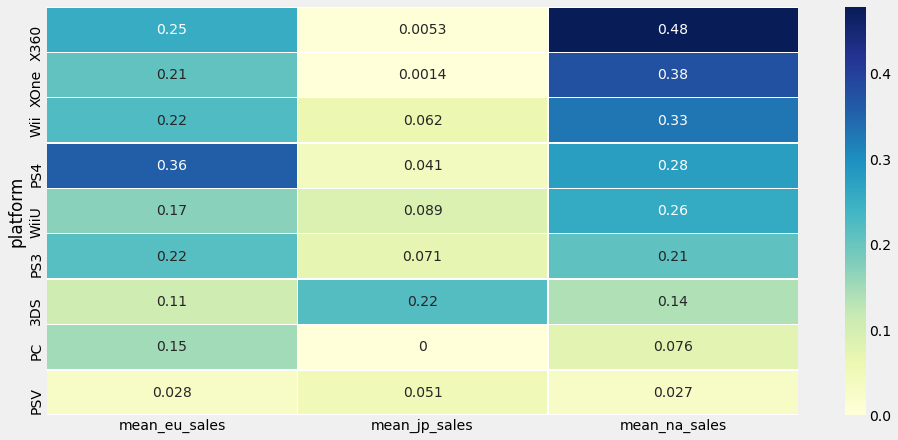

,mean_eu_sales,mean_jp_sales,mean_na_sales
platform,,,
PS4,0.359923,0.040714,0.277398
X360,0.254728,0.005340,0.478129
Wii,0.224364,0.061636,0.329818
PS3,0.217146,0.071437,0.210000
XOne,0.208866,0.001377,0.377004
WiiU,0.170952,0.088503,0.259184
PC,0.150510,0.000000,0.075529
3DS,0.107884,0.221134,0.139773
PSV,0.027640,0.051192,0.026715


In [118]:
actual_platforms = ['X360', 'XOne', 'PS3', 'PS4', 'Wii', 'WiiU', '3DS', 'PSV', 'PC']

platforms_regions = pd.pivot_table(sample.query('platform in @actual_platforms'), index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['mean'])
platforms_regions.columns = [("_".join(c) if c[1] != "" else c[0]) for c in platforms_regions.columns] #разровняем столбцы
plt.style.use("fivethirtyeight")
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(platforms_regions.sort_values(by='mean_na_sales', ascending=False), cmap="YlGnBu", linewidths=.5, annot=True)#, fmt="d")
plt.show()
platforms_regions.sort_values(by='mean_eu_sales', ascending=False)

**Топ-5 платформ** в млн. копий на игру:

1. Северная Америка: Х360 (0,48), XOne (0,38), Wii (0,33), PS4 (0,28), WiiU (0,26).
2. Европа: PS4 (0,36), Х360 (0,25), WiiU (0,22), PS3 (0,217), XOne (0,21).
3. Япония: 3DS (0,22), WiiU (0,089), PS3 (0,07), Wii (0,06), PSV (0,05).

В Cеверной Америке более популярны платформы XBox, в Европе - PlayStation, в Японии - Nintendo.

### Популярные жанры

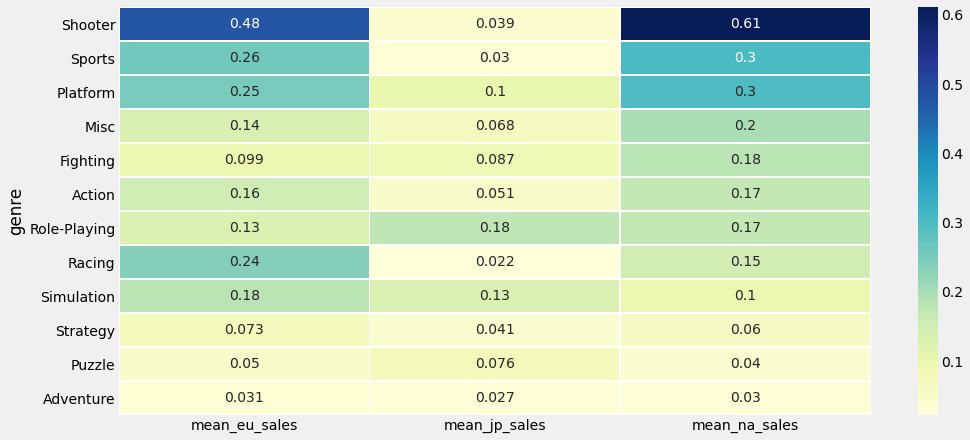

,mean_eu_sales,mean_jp_sales,mean_na_sales
genre,,,
Shooter,0.478776,0.038945,0.610928
Sports,0.257799,0.029888,0.304216
Platform,0.251882,0.101529,0.298588
Racing,0.237304,0.021739,0.149739
Simulation,0.181875,0.130125,0.099625
Action,0.155331,0.050720,0.173055
Misc,0.136373,0.067876,0.197876
Role-Playing,0.131162,0.176865,0.172973
Fighting,0.098991,0.086606,0.181560


In [119]:
platforms_genres = pd.pivot_table(sample, index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['mean'])
platforms_genres.columns = [("_".join(c) if c[1] != "" else c[0]) for c in platforms_genres.columns] #разровняем столбцы
plt.style.use("fivethirtyeight")
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(platforms_genres.sort_values(by='mean_na_sales', ascending=False), cmap="YlGnBu", linewidths=.5, annot=True)#, fmt="d")
plt.show()
platforms_genres.sort_values(by='mean_eu_sales', ascending=False)

**Топ-5 жанров** в млн. копий на игру:

1. Северная Америка: Shooter (0,61), Sports (0,304), Platform (0,30), Misc (0,2), Fighting (0,18).
2. Европа: Shooter (0,48), Sports (0,26), Platform (0,25), Racing (0,24), Simulation (0,18).
3. Япония: Role-playing (0,18), Simulation (0,13), Platform (0,1), Fighting (0,087), Puzzle (0,076).

В Cеверной Америке и Европе популярны примерно одни жанры (Shooter, Platform, Sports), в Японии же лидеры другие - Role-playing с огромным отрывом. Похоже именно за счет Японии ролевые игры ворвались в ТОП по всему миру:
1. Shooter - 1.29
2. Platform - 0.72
3. Sports - 0.68
4. Role-Playing - 0.52
5. Racing - 0.47

### Рейтинги

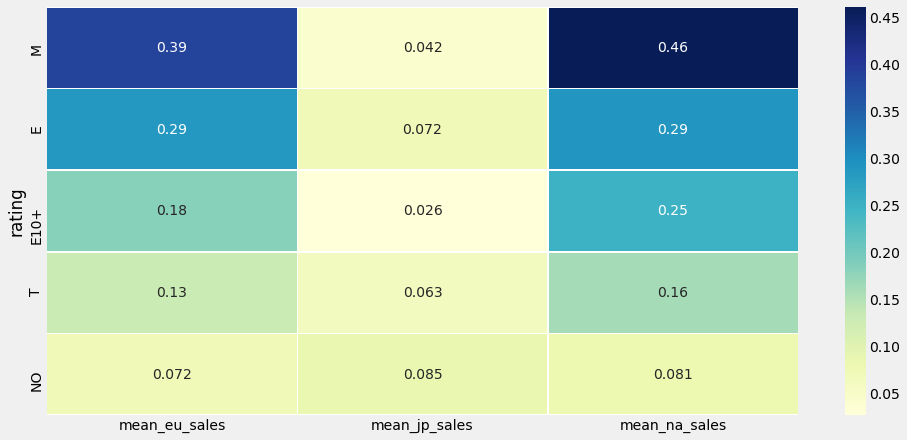

,mean_eu_sales,mean_jp_sales,mean_na_sales
rating,,,
M,0.386561,0.042147,0.460577
E,0.286152,0.071722,0.289544
E10+,0.182907,0.026166,0.248978
T,0.128544,0.063155,0.160243
NO,0.071708,0.085486,0.080964


In [120]:
platforms_genres = pd.pivot_table(sample, index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['mean'])
platforms_genres.columns = [("_".join(c) if c[1] != "" else c[0]) for c in platforms_genres.columns] #разровняем столбцы
plt.style.use("fivethirtyeight")
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(platforms_genres.sort_values(by='mean_na_sales', ascending=False), cmap="YlGnBu", linewidths=.5, annot=True)#, fmt="d")
plt.show()
platforms_genres.sort_values(by='mean_na_sales', ascending=False)

**Рейтинги и продажи по регионам** в млн. копий на игру:

По глобальным продажам мы сделали ранее следующие выводы:   
Средние продажи на игру с рейтингом M максимальны (1,02 млн. копий), далее E (0,73 млн. копий), далее E10+ (0,51 млн. копий), далее T (0,40 млн. копий), по остальным (EC, PR) рейтингам нет данных. Средние продажи игр без рейтинга значительно ниже (0,26 млн. копий) - не вариант для хороших продаж.

1. Северная Америка: M (0,46), E (0,29), Е10+ (0,25), T (0,16). Без рейтинга - всего 0,08 млн. копий.
2. Европа: M (0,39), E (0,29), Е10+ (0,18), T (0,13). Без рейтинга - всего 0,07 млн. копий.
3. Япония: Без рейтинга (0,08 млн. копий), E (0,07), T (0,06), M (0,042), Е10+ (0,026).  

В Cеверной Америке и Европе продажи по рейтингам ранжированы идентичн: лидеры - игры для взрослых и для всех, в конце - для тинейджеров. В Японии лидируют игры без рейтинга, для всех и тинейджеров. 

### Вывод

Средние продажи на игру в миллионах копий выше всего в Северной Америке, затем в Европе, затем в Японии и на последнем месте - остальные страны.  

**Топ-5 платформ** в млн. копий на игру:

1. Северная Америка: Х360 (0,48), XOne (0,38), Wii (0,33), PS4 (0,28), WiiU (0,26).
2. Европа: PS4 (0,36), Х360 (0,25), WiiU (0,22), PS3 (0,217), XOne (0,21).
3. Япония: 3DS (0,22), WiiU (0,089), PS3 (0,07), Wii (0,06), PSV (0,05).

В Cеверной Америке более популярны платформы XBox, в Европе - PlayStation, в Японии - Nintendo.

**Топ-5 жанров** в млн. копий на игру:

1. Северная Америка: Shooter (0,61), Sports (0,304), Platform (0,30), Misc (0,2), Fighting (0,18).
2. Европа: Shooter (0,48), Sports (0,26), Platform (0,25), Racing (0,24), Simulation (0,18).
3. Япония: Role-playing (0,18), Simulation (0,13), Platform (0,1), Fighting (0,087), Puzzle (0,076).

В Cеверной Америке и Европе популярны примерно одни жанры (Shooter, Platform, Sports), в Японии же лидеры другие - Role-playing с огромным отрывом. Похоже именно за счет Японии ролевые игры ворвались в ТОП по всему миру:
1. Shooter - 1.29
2. Platform - 0.72
3. Sports - 0.68
4. Role-Playing - 0.52
5. Racing - 0.47

**Рейтинги и продажи по регионам** в млн. копий на игру:

По глобальным продажам мы сделали ранее следующие выводы:   
Средние продажи на игру с рейтингом M максимальны (1,02 млн. копий), далее E (0,73 млн. копий), далее E10+ (0,51 млн. копий), далее T (0,40 млн. копий), по остальным (EC, PR) рейтингам нет данных. Средние продажи игр без рейтинга значительно ниже (0,26 млн. копий) - не вариант для хороших продаж.

1. Северная Америка: M (0,46), E (0,29), Е10+ (0,25), T (0,16). Без рейтинга - всего 0,08 млн. копий.
2. Европа: M (0,39), E (0,29), Е10+ (0,18), T (0,13). Без рейтинга - всего 0,07 млн. копий.
3. Япония: Без рейтинга (0,08 млн. копий), E (0,07), T (0,06), M (0,042), Е10+ (0,026).  

В Cеверной Америке и Европе продажи по рейтингам ранжированы идентичн: лидеры - игры для взрослых и для всех, в конце - для тинейджеров. В Японии лидируют игры без рейтинга, для всех и тинейджеров. 

## Оценки пользователей по платформам и жанрам

### Оценки пользователей по платформам

In [121]:
platforms_user_scores = pd.pivot_table(sample, index=['platform'], values='user_score', aggfunc=['sum','count', 'mean'])
platforms_user_scores = platforms_user_scores.reset_index() #сбросим мультииндекс по строкам
platforms_user_scores.columns = [("_".join(c) if c[1] != "" else c[0]) for c in platforms_user_scores.columns] #разровняем столбцы
platforms_user_scores.sort_values(by='mean_user_score', ascending=False)

,platform,sum_user_score,count_user_score,mean_user_score
6,PSV,963.3,130,7.410000
0,3DS,808.3,115,7.028696
1,DS,21.0,3,7.000000
8,WiiU,690.4,100,6.904000
4,PS4,1734.3,257,6.748249
3,PS3,1857.1,284,6.539085
10,XOne,1186.9,182,6.521429
2,PC,1360.0,211,6.445498
9,X360,1469.8,236,6.227966
7,Wii,111.2,18,6.177778


Из действующих платформ наибольшие оценки в таком порядке: PSV, PC, WiiU, 3DS, PS4, Wii, PS3, X360, XOne. На XBox оценки ниже всего. 

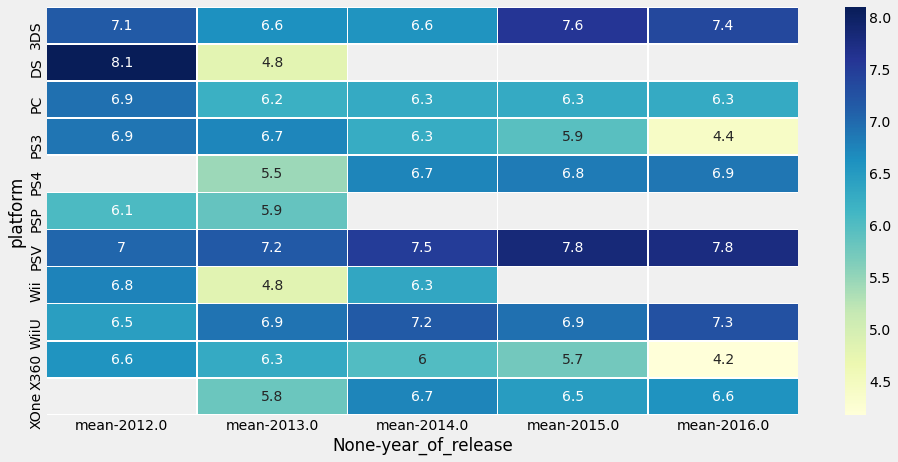

In [122]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(pd.pivot_table(sample, index=['platform'], columns='year_of_release', values='user_score', aggfunc=['mean']), 
                 cmap="YlGnBu", linewidths=.5, annot=True)
plt.show()

Для более поздних игр оценки игроков снижаются на многих платформах. Стабильны на PS4, XOne; подрастают на PSV, PS4, WiiU, 3DS. На PC для игр 2013-2016 годов оценки стабильны.

### Оценки пользователей по жанрам

In [123]:
genres_user_scores = pd.pivot_table(sample, index=['genre'], values='user_score', aggfunc=['sum','count', 'mean'])
genres_user_scores = genres_user_scores.reset_index() #сбросим мультииндекс по строкам
genres_user_scores.columns = [("_".join(c) if c[1] != "" else c[0]) for c in genres_user_scores.columns] #разровняем столбцы
genres_user_scores.sort_values(by='mean_user_score', ascending=False)

,genre,sum_user_score,count_user_score,mean_user_score
5,Puzzle,68.7,9,7.633333
1,Adventure,537.6,72,7.466667
7,Role-Playing,1241.2,171,7.258480
3,Misc,464.9,67,6.938806
2,Fighting,482.7,70,6.895714
0,Action,3629.0,531,6.834275
4,Platform,449.2,66,6.806061
9,Simulation,273.5,42,6.511905
8,Shooter,1261.7,196,6.437245
11,Strategy,224.7,35,6.420000


Наибольшие средние оценки в таком порядке: Role-Playing, Platform, Fighting, Strategy, Puzzle

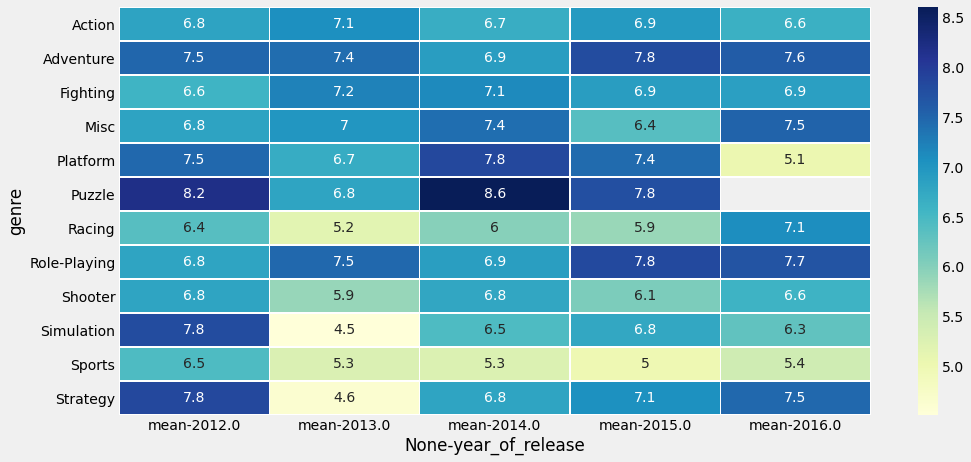

In [124]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(pd.pivot_table(sample, index=['genre'], columns='year_of_release', values='user_score', aggfunc=['mean']), 
                 cmap="YlGnBu", linewidths=.5, annot=True)
plt.show()

Для более поздних игр оценки игроков снижаются почти по всем жанрам.

## Проверка гипотез

Проверим t-тестами Стьюдента гипотезы для двух разных случаев:   
1. О равенстве средних двух генеральных совокупностей: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.   Альтернативной гипотезой будет: средние пользовательские рейтинги платформы PC не равны Xbox One (7,0 и 6,5 по выборкам).
2. О равенстве средних двух генеральных совокупностей: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы (7,0 и 6,9 соответственно).  
Альтернативной гипотезой будет: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (7,0 и 6,9 соответственно)

Уровень значимости зададим в размере 1%, для точности.
Представляется, что все вышеперечисленные генеральные совокупности независимы. Выборки у нас в сотни значений, этого достаточно, мы не знаем какие дисперсии у генеральных совокупностей, проверим гипотезу о равенстве дисперсий тестом Левена.

### Средние пользовательские рейтинги платформ Xbox One и PC 

In [125]:
xone_sample = sample.query('platform == "XOne"')
pc_sample = sample.query('platform == "PC"')
xone_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    float64
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.1+ KB


In [126]:
pc_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 192 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             255 non-null    object 
 1   platform         255 non-null    object 
 2   year_of_release  255 non-null    float64
 3   genre            255 non-null    object 
 4   na_sales         255 non-null    float64
 5   eu_sales         255 non-null    float64
 6   jp_sales         255 non-null    float64
 7   other_sales      255 non-null    float64
 8   critic_score     203 non-null    float64
 9   user_score       211 non-null    float64
 10  rating           255 non-null    object 
 11  total_sales      255 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.9+ KB


Отрежем строки с NaN для корректного расчета статтестов.

In [127]:
xone_sample = xone_sample.dropna(subset=['user_score'])
pc_sample = pc_sample.dropna(subset=['user_score'])
xone_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             182 non-null    object 
 1   platform         182 non-null    object 
 2   year_of_release  182 non-null    float64
 3   genre            182 non-null    object 
 4   na_sales         182 non-null    float64
 5   eu_sales         182 non-null    float64
 6   jp_sales         182 non-null    float64
 7   other_sales      182 non-null    float64
 8   critic_score     165 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           182 non-null    object 
 11  total_sales      182 non-null    float64
dtypes: float64(8), object(4)
memory usage: 18.5+ KB


In [128]:
pc_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 192 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             211 non-null    object 
 1   platform         211 non-null    object 
 2   year_of_release  211 non-null    float64
 3   genre            211 non-null    object 
 4   na_sales         211 non-null    float64
 5   eu_sales         211 non-null    float64
 6   jp_sales         211 non-null    float64
 7   other_sales      211 non-null    float64
 8   critic_score     202 non-null    float64
 9   user_score       211 non-null    float64
 10  rating           211 non-null    object 
 11  total_sales      211 non-null    float64
dtypes: float64(8), object(4)
memory usage: 21.4+ KB


In [129]:
st.levene(xone_sample['user_score'], pc_sample['user_score'])

LeveneResult(statistic=6.059244325684977, pvalue=0.014264583982264795)

Тест Левена дает значимый результат, вероятно дисперсии двух выборок равны.

In [130]:
alpha = 0.01

results = st.ttest_ind(xone_sample['user_score'], pc_sample['user_score'], equal_var = True)
print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


Средние оценки пользователей не одинаковы. 

Проверим еще одну гипотезу: средние пользовательские рейтинги платформы PC больше Xbox One (7,0 и 6,5 по выборкам). Сделаем односторонний тест по выборке платформы PC (для этого теста нулевая гипотеза та же - средние равны, альтернативная - средние пользовательские рейтинги платформы PC больше).

In [131]:
alpha = 0.01

mean_xone = xone_sample['user_score'].mean()

results = st.ttest_1samp(pc_sample['user_score'], mean_xone)

#тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue / 2)

#тест односторонний влево:
#отвергаем гипотезу только тогда, когда выборочное среднее значимо больше предполагаемого значения
if (results.pvalue / 2 < alpha) and (pc_sample['user_score'].mean() > mean_xone):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 0.25324512350541273
Не отвергаем нулевую гипотезу


Средние пользовательские рейтинги PC больше, чем XOne.

###  Средние пользовательские рейтинги жанров Action и Sports

In [132]:
action_sample = sample.query('genre == "Action"')
sports_sample = sample.query('genre == "Sports"')
action_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1041 non-null   object 
 1   platform         1041 non-null   object 
 2   year_of_release  1041 non-null   float64
 3   genre            1041 non-null   object 
 4   na_sales         1041 non-null   float64
 5   eu_sales         1041 non-null   float64
 6   jp_sales         1041 non-null   float64
 7   other_sales      1041 non-null   float64
 8   critic_score     445 non-null    float64
 9   user_score       531 non-null    float64
 10  rating           1041 non-null   object 
 11  total_sales      1041 non-null   float64
dtypes: float64(8), object(4)
memory usage: 105.7+ KB


In [133]:
sports_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             268 non-null    object 
 1   platform         268 non-null    object 
 2   year_of_release  268 non-null    float64
 3   genre            268 non-null    object 
 4   na_sales         268 non-null    float64
 5   eu_sales         268 non-null    float64
 6   jp_sales         268 non-null    float64
 7   other_sales      268 non-null    float64
 8   critic_score     143 non-null    float64
 9   user_score       195 non-null    float64
 10  rating           268 non-null    object 
 11  total_sales      268 non-null    float64
dtypes: float64(8), object(4)
memory usage: 27.2+ KB


Отрежем строки с NaN для корректного расчета статтестов.

In [134]:
action_sample = action_sample.dropna(subset=['user_score'])
sports_sample = sports_sample.dropna(subset=['user_score'])
action_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             531 non-null    object 
 1   platform         531 non-null    object 
 2   year_of_release  531 non-null    float64
 3   genre            531 non-null    object 
 4   na_sales         531 non-null    float64
 5   eu_sales         531 non-null    float64
 6   jp_sales         531 non-null    float64
 7   other_sales      531 non-null    float64
 8   critic_score     440 non-null    float64
 9   user_score       531 non-null    float64
 10  rating           531 non-null    object 
 11  total_sales      531 non-null    float64
dtypes: float64(8), object(4)
memory usage: 53.9+ KB


In [135]:
sports_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             195 non-null    object 
 1   platform         195 non-null    object 
 2   year_of_release  195 non-null    float64
 3   genre            195 non-null    object 
 4   na_sales         195 non-null    float64
 5   eu_sales         195 non-null    float64
 6   jp_sales         195 non-null    float64
 7   other_sales      195 non-null    float64
 8   critic_score     141 non-null    float64
 9   user_score       195 non-null    float64
 10  rating           195 non-null    object 
 11  total_sales      195 non-null    float64
dtypes: float64(8), object(4)
memory usage: 19.8+ KB


In [136]:
st.levene(action_sample['user_score'], sports_sample['user_score'])

LeveneResult(statistic=18.636568105575254, pvalue=1.8018286275085335e-05)

Тест Левена дает незначимый результат, вероятно дисперсии двух выборок не равны.

In [137]:
alpha = 0.01

results = st.ttest_ind(action_sample['user_score'], sports_sample['user_score'], equal_var = False)
print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.337200239591976e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports примерно одинаковые.

## Общий вывод

**ГОДЫ ВЫХОДА ИГР:**

1. Количество выпущенных игр на всех платформах было максимальным в 2002-2011 годах и с тех пор снижается. 
2. Общая выручка по всем регионам была максимальной для игр, выпущенных в 2005-2010 и с тех пор снижается. 
3. Для игр, выпущенных до 2002 года средние продажи одной игры были существенно выше (обычно 0,6-0,8 млн. копий в год и выше), затем снизились до уровней 0,45-0,55 млн. копий в год. Для игр, выпущенных в 2012-2014 годах средние продажи одной игры в миллионах копий резко выросли (0,55-0,67 млн. копий), для игр, выпущенных в 2015-2016 годах средние продажи стали также резко снижаться (2015 - 0,44 млн. копий, 2016 - 0,26 млн. копий. Вероятно нужно 2-3 года для набора основной массы продаж игры, дальше они сильно падают.

**ОЦЕНКИ ИГРОКОВ И КРИТИКОВ:**

1. Оценки игроков имеют небольшую тенденцию к ухудшению, начавшуюся, по видимому, для игр 2005 года и старше. С оценками критиков похожая небольшая тенденция к ухудшению с 2010 года. Однако эти тенденции не слишком заметны.
2. Оценки игроков практически ни на одной платформе не влияют на продажи (очень слабая то положительная, то отрицательная корреляция), но выделяется платформа WiiU, где между оценками гроков и продажами есть слабая корреляция.  
3. Оценки критиков на всех платформах слабо влияют на продажи (слабая положительная корреляция).

**РЕГИОНЫ:**

Средние продажи на игру в миллионах копий выше всего в Северной Америке, затем в Европе, затем в Японии и на последнем месте - остальные страны.  

**ПОПУЛЯРНЫЕ ПЛАТФОРМЫ:**

1. Средний срок жизни платформы - 7 лет, медианный 7,8 лет. Диапазон 1-26 лет. Большинство платформ живет до 12 лет.
2. Чем дольше срок жизни платформы, тем в целом больше общие продажи, что логично (умеренная положительная корреляция - 0,51). Корреляция срока жизни со средними продажами на игру слабая положительная (0,34).
3. До 2002 года существовал существенный разброс платформ по средним продажам на игру, в дальнейшем ситуация выровнялась.
4. 9 платформ действуют (последний год, доступный в данных - 2016). Для 3 платформ последний год 2011, 2013 и 2015. Еще 4 платформы - 2007-2008 годы. Еще 4 платформы - 2001 (2шт), 2003, 2004 годы. Остальные существовали до 2000 года. Из платформ, продававших игры после 2000 года. Мы взяли данные по играм, вышедшим в 2002 году и позже.
5. X360 (год выхода консоли 2005), PS3 (2005), Wii (2006), PS4 (2013), XOne (2013), WiiU (2012) - средние продажи по ним от 0.5 до 0,8 млн. копий на одну игру. Современные лидеры рынка. При этом, на старых платформах XBox, PlayStation и Nintendo 2005-2006 годов продажи игр ниже, чем у новых, и упали почти до нуля. Медианы и межквартильный размах также свидетельствуют в пользу новых платформ от большой тройки. С учетом среднего срока жизни платформы в 7,8 лет на старых платформы XBox, PlayStation и Nintendo 2005-2006 годов нет особого смысла выпускать новые игры. 
**Самые популярные и продающие платформы: PS4 (2013), XOne (2013), WiiU (2012).**


***Топ-5 платформ*** в млн. копий на игру по значимым регионам:

1. Северная Америка: Х360 (0,48), XOne (0,38), Wii (0,33), PS4 (0,28), WiiU (0,26).
2. Европа: PS4 (0,36), Х360 (0,25), WiiU (0,22), PS3 (0,217), XOne (0,21).
3. Япония: 3DS (0,22), WiiU (0,089), PS3 (0,07), Wii (0,06), PSV (0,05).

В Cеверной Америке более популярны платформы XBox, в Европе - PlayStation, в Японии - Nintendo.

**ЖАНРЫ:**

Глобально средние продажи на игру по жанрам отличаются. Вот пятерка лидеров (млн. копий): 
1. Shooter - 1.29
2. Platform - 0.72
3. Sports - 0.68
4. Role-Playing - 0.52
5. Racing - 0.47

***Топ-5 жанров*** в млн. копий на игру по регионам:

1. Северная Америка: Shooter (0,61), Sports (0,304), Platform (0,30), Misc (0,2), Fighting (0,18).
2. Европа: Shooter (0,48), Sports (0,26), Platform (0,25), Racing (0,24), Simulation (0,18).
3. Япония: Role-playing (0,18), Simulation (0,13), Platform (0,1), Fighting (0,087), Puzzle (0,076).

В Cеверной Америке и Европе популярны примерно одни жанры (Shooter, Platform, Sports), в Японии же лидеры другие - Role-playing с огромным отрывом. Похоже именно за счет Японии ролевые игры ворвались в ТОП по всему миру:

**РЕЙТИНГИ:**

По глобальным продажам мы сделали ранее следующие выводы:   
Средние продажи на игру с рейтингом M максимальны (1,02 млн. копий), далее E (0,73 млн. копий), далее E10+ (0,51 млн. копий), далее T (0,40 млн. копий), по остальным (EC, PR) рейтингам нет данных. Средние продажи игр без рейтинга значительно ниже (0,26 млн. копий) - не вариант для хороших продаж.

***Рейтинги и продажи по регионам*** в млн. копий на игру:

1. Северная Америка: M (0,46), E (0,29), Е10+ (0,25), T (0,16). Без рейтинга - всего 0,08 млн. копий.
2. Европа: M (0,39), E (0,29), Е10+ (0,18), T (0,13). Без рейтинга - всего 0,07 млн. копий.
3. Япония: Без рейтинга (0,08 млн. копий), E (0,07), T (0,06), M (0,042), Е10+ (0,026).  

В Cеверной Америке и Европе продажи по рейтингам ранжированы идентичн: лидеры - игры для взрослых и для всех, в конце - для тинейджеров. В Японии лидируют игры без рейтинга, для всех и тинейджеров. 

**ПРОВЕРКА ГИПОТЕЗ:**

1. Средние пользовательские рейтинги PC больше, чем XOne.
2. Средние пользовательские рейтинги жанров Action и Sports примерно одинаковые.

**ЗОНЫ ВЫСОКИХ ПРОДАЖ:**

Глобально самые продающие и перспективные платформы: PS4, XOne, WiiU.  
Самые продающиеся жанры: Shooter, Platform, Sports, Role-Playing, Racing.  
Самые продающиеся рейтинги: M, E.  
Оценки игроков практически ни на одной платформе не влияют на продажи, но выделяется платформа WiiU, где между оценками гроков и продажами есть слабая положительная корреляция.  
Оценки критиков на всех платформах слабо влияют на продажи (слабая положительная корреляция).